In [1]:
!python -V

Python 3.7.4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from itertools import combinations

from scipy.integrate import odeint
import os
from haversine import haversine
import json

In [3]:
def distance(a,b): #((lat1, lon1), (lat1, lon1))
    return (haversine(a,b))

In [4]:
states = pd.read_csv(r'state_population.csv')#getting the population file
states.columns
Pop_list = []
State_list = []
for rows in states.itertuples():
    my_list =[rows.Population]
    Pop_list.append(my_list)
    
def SIR_mod(N,I0,R0):
    # Total population, N.
    # Initial number of infected and recovered individuals, I0 and R0.
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = 0.07, 1./32 
    # A grid of time points (in days)
    t = np.linspace(0, 10, 60)
    #print(t)
    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        
        return dSdt, dIdt, dRdt
    
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    
    #print("S:", S[-1])
    #print("I:", I[-1])
    #print("R:", R[-1])
    
    #print("New infections: ", I[-1] - I0)
    new_inf = I[-1]-I0
    return new_inf
    
dict1={} # dictionary containing new infection per state
for i in range(len(Pop_list)):
    Pop = Pop_list[i][0]
    pathname1 = '.\States' #change this path to the path containing all the state files, 
    #note that all the files must be in the smae order as the first column of pop file
    def foo(path):
        var = os.listdir(path)[i]
        return var
    
    klingon = foo(pathname1)
    klingon_long = os.path.join(pathname1,klingon)
    key = klingon.split(".")
    key_name = key[0]
    state_each = pd.read_csv(klingon_long)
    Test_pos = state_each.loc[(state_each.shape[0]-61),'Confirmed']
    Recover_test_pos = state_each.loc[(state_each.shape[0]-61),'Recovered']
    Decease = state_each.loc[(state_each.shape[0]-61),'Deceased']
    Removed = Recover_test_pos+Decease
    var = SIR_mod(Pop,Test_pos,Removed)   
    dict1[key_name] = var

print(dict1)

{'AN': 0.9465652974670018, 'AP': 276.86330596941684, 'AR': 0.0, 'AS': 19.40491146029816, 'BR': 80.45928770924579, 'CH': 117.73183068780764, 'CT': 996.4479362368329, 'DL': 593.3144337067051, 'DN': 5.205827367651693, 'GA': 66.23438780086238, 'GJ': 847.078591516939, 'HP': 125.87836652069092, 'HR': 464.2302149806253, 'JH': 91.8167058149769, 'JK': 92.28614150686019, 'KA': 1087.4633476190866, 'KL': 1161.9898706762488, 'LA': 6.1518202429690945, 'LD': 0.9464643297759792, 'MH': 15059.273496513895, 'ML': 0.9465804679767871, 'MN': 4.732869465195382, 'MP': 810.1959989211318, 'MZ': 0.47328974929280143, 'NL': 0.47329169403043103, 'OR': 80.45851072344615, 'PB': 1236.2140901762564, 'PY': 59.14158283050614, 'RJ': 316.62094977244897, 'SK': 0.9465730548939875, 'TG': 203.9787985352914, 'TN': 774.2294989936672, 'TR': 4.259604811239317, 'UP': 347.3924130211283, 'UT': 110.74154382893897, 'WB': 218.6562113373385}


In [5]:
total_dem = 0
st_dem = {}
for key in dict1:
    if dict1[key]*0.01*3 < 70: #we have take 70 as oxygen is usually carried on tankers by trains, each tanker containing 15-10 MT and one train would have around 4-5 tankers
        total_dem += 70
        st_dem[key] = 70
    else:
        total_dem += round(dict1[key]*0.01*3) #dict1[key]*0.1*0.06
        st_dem[key] = round(dict1[key]*0.01*3)
print(total_dem)
print(st_dem)

2902.0
{'AN': 70, 'AP': 70, 'AR': 70, 'AS': 70, 'BR': 70, 'CH': 70, 'CT': 70, 'DL': 70, 'DN': 70, 'GA': 70, 'GJ': 70, 'HP': 70, 'HR': 70, 'JH': 70, 'JK': 70, 'KA': 70, 'KL': 70, 'LA': 70, 'LD': 70, 'MH': 452.0, 'ML': 70, 'MN': 70, 'MP': 70, 'MZ': 70, 'NL': 70, 'OR': 70, 'PB': 70, 'PY': 70, 'RJ': 70, 'SK': 70, 'TG': 70, 'TN': 70, 'TR': 70, 'UP': 70, 'UT': 70, 'WB': 70}


In [6]:
supp = pd.read_csv("oxygen.csv")

In [7]:
supp.values[0]

array(['AS', 37, 26.14, 91.77], dtype=object)

In [8]:
supp

,State,Capacity(MT) per day,lat,lon
0,AS,37,26.140000,91.770000
1,CT,85,21.489585,81.809612
2,GJ,488,20.419862,72.837063
3,HR,40,29.000000,76.000000
4,HP,120,31.929235,77.182846
5,JH,434,23.455981,85.255730
6,KL,298,10.352959,76.511975
7,KA,275,14.520390,75.722352
8,MH,991,19.531932,76.055457
9,OR,340,20.291850,85.805340


In [9]:
a = supp.loc[supp['State'] == 'AS']
supp_lat = supp["lat"].tolist()
supp_lng = supp["lon"].tolist()

In [10]:
total_supp = sum(supp["Capacity(MT) per day"].tolist())
print(total_supp)

4249


In [11]:
supp_lat

[26.14,
 21.489585,
 20.419862,
 29.0,
 31.929235,
 23.455981,
 10.352959,
 14.520389999999999,
 19.531932,
 20.29185,
 26.810578000000003,
 17.99,
 11.80835,
 11.934057000000001,
 30.041738,
 27.130334,
 22.996495]

In [12]:
supp_lng

[91.77,
 81.809612,
 72.837063,
 76.0,
 77.182846,
 85.25573,
 76.511975,
 75.722352,
 76.05545699999999,
 85.80534,
 73.768455,
 79.59,
 79.774516,
 79.83064499999999,
 79.089691,
 80.859666,
 87.685588]

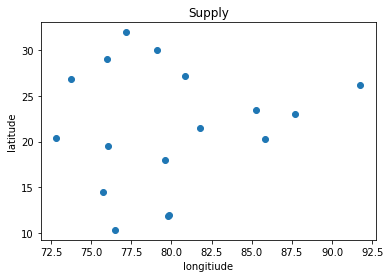

In [13]:
#Visualize
plt.scatter(supp_lng, supp_lat)
plt.title("Supply")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

In [14]:
with open("states_location.json", "r") as f:
    data = f.read()
st_loc = json.loads(data)

In [15]:
st_loc

{'AN': {'lat': 11.68, 'lng': 92.77},
 'AP': {'lat': 16.5, 'lng': 80.6},
 'AR': {'lat': 28.364199, 'lng': 94.758627},
 'AS': {'lat': 26.14, 'lng': 91.77},
 'BR': {'lat': 25.644085, 'lng': 85.906508},
 'CH': {'lat': 30.735154, 'lng': 76.770503},
 'CT': {'lat': 21.489585, 'lng': 81.809612},
 'DL': {'lat': 28.657291, 'lng': 77.22726},
 'GA': {'lat': 15.300454, 'lng': 74.085513},
 'GJ': {'lat': 20.419862, 'lng': 72.837063},
 'HP': {'lat': 31.929235, 'lng': 77.182846},
 'HR': {'lat': 29.0, 'lng': 76.0},
 'JH': {'lat': 23.455981, 'lng': 85.25573},
 'JK': {'lat': 33.45, 'lng': 76.24},
 'KA': {'lat': 14.52039, 'lng': 75.722352},
 'KL': {'lat': 10.352959, 'lng': 76.511975},
 'LA': {'lat': 33.91024, 'lng': 77.58481},
 'MH': {'lat': 19.531932, 'lng': 76.055457},
 'ML': {'lat': 25.537943, 'lng': 91.29991},
 'MN': {'lat': 24.720882, 'lng': 93.922939},
 'MP': {'lat': 23.114533, 'lng': 78.281079},
 'MZ': {'lat': 23.214617, 'lng': 92.868761},
 'OR': {'lat': 20.29185, 'lng': 85.80534},
 'PB': {'lat': 30

In [16]:
dem_lat = []
dem_lng = []
for key in st_loc:
    dem_lat.append(st_loc[key]["lat"])
    dem_lng.append(st_loc[key]["lng"])

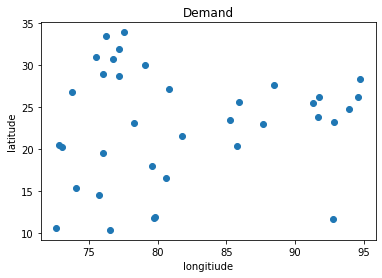

In [17]:
#visualize
plt.scatter(dem_lng, dem_lat)
plt.title("Demand")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.show()

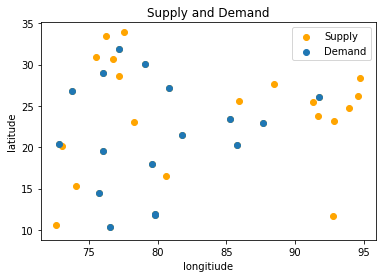

In [18]:
supply = plt.scatter(dem_lng, dem_lat, color="orange")
demand = plt.scatter(supp_lng, supp_lat)
plt.title("Supply and Demand")
plt.xlabel("longitiude")
plt.ylabel("latitude")
plt.legend((supply, demand),("Supply", "Demand"))
plt.show()

In [19]:
distance((st_loc["LD"]["lat"],st_loc["LD"]["lng"]), (supp.values[0][2],supp.values[0][3]))

2653.3826444868723

# Prepare matrix

In [20]:
index_head = supp["State"].tolist()
column_head = list(st_loc)

index_head.append("Demand")
index_head.append("Demand_fulfilled")
column_head.append("Supp_Capacity")
column_head.append("Supplied")

data = np.zeros((len(index_head),len(column_head)))

dist_mat = pd.DataFrame(data=data, index = index_head, columns = column_head, dtype=object)
dist_mat = dist_mat.rename_axis("Supply", axis="index")
dist_mat = dist_mat.rename_axis("Demand", axis="columns")

In [21]:
dist_mat

Demand,AN,AP,AR,AS,BR,CH,CT,DL,GA,GJ,...,TR,UP,UT,WB,SK,DN,NL,LD,Supp_Capacity,Supplied
Supply,,,,,,,,,,,,,,,,,,,,,
AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
for x in range(36):
    dem_lat = st_loc[list(st_loc)[x]]["lat"]
    dem_lng = st_loc[list(st_loc)[x]]["lng"]
    for y in range(17):
        #print(dist_mat.columns[x], dist_mat.index[y])
        supp_lat = supp.loc[supp['State'] == dist_mat.index[y]].values[0][2]
        supp_lng = supp.loc[supp['State'] == dist_mat.index[y]].values[0][3]
        d = distance((dem_lat, dem_lng),(supp_lat, supp_lng))
        #print("Demand:", list(st_loc)[x], dem_lat, dem_lng, "and Supply:", y, supp_lat, supp_lng)
        dist_mat[dist_mat.columns[x]][dist_mat.index[y]] = [d, 0]
        
        dist_mat["Supp_Capacity"][dist_mat.index[y]] = float(supp.loc[supp['State'] == dist_mat.index[y]].values[0][1])
    dist_mat[dist_mat.columns[x]]["Demand"] = st_dem[dist_mat.columns[x]]

In [23]:
dist_mat

Demand,AN,AP,AR,AS,BR,CH,CT,DL,GA,GJ,...,TR,UP,UT,WB,SK,DN,NL,LD,Supp_Capacity,Supplied
Supply,,,,,,,,,,,,,,,,,,,,,
AS,"[1611.2935704641097, 0]","[1575.627819016742, 0]","[385.2584652264463, 0]","[0.0, 0]","[589.0782149324817, 0]","[1551.4768632036287, 0]","[1136.9890545075582, 0]","[1461.7090976477475, 0]","[2194.9249996979906, 0]","[2033.256485105355, 0]",...,"[263.05523164572634, 0]","[1089.6570753595806, 0]","[1316.4294806658231, 0]","[541.0244040647854, 0]","[366.8114841344721, 0]","[2025.6149731359135, 0]","[281.3259926010796, 0]","[2653.3826444868723, 0]",37,0
CT,"[1596.7296638731068, 0]","[569.1948783368455, 0]","[1511.4971675210254, 0]","[1136.9890545075582, 0]","[622.5997630612262, 0]","[1144.1486157723127, 0]","[0.0, 0]","[920.7332358850043, 0]","[1066.2446566744547, 0]","[939.1402069303311, 0]",...,"[1046.3715707202919, 0]","[634.5580286985532, 0]","[989.0753138003274, 0]","[627.4814088169923, 0]","[955.3541582944277, 0]","[925.3452405178737, 0]","[1398.9359405919884, 0]","[1559.7863154908925, 0]",85,0
GJ,"[2338.164156161738, 0]","[927.3286445382172, 0]","[2384.436536056759, 0]","[2033.256485105355, 0]","[1457.0600659534277, 0]","[1212.6636339526704, 0]","[939.1402069303311, 0]","[1017.6548872671879, 0]","[584.3734793200813, 0]","[0.0, 0]",...,"[1977.4978595897, 0]","[1105.3709616059107, 0]","[1240.415426836162, 0]","[1559.7461567857385, 0]","[1773.7095199826665, 0]","[30.179232047744602, 0]","[2308.086482429842, 0]","[1095.480226825182, 0]",488,0
HR,"[2594.3252670114616, 0]","[1467.3324080401185, 0]","[1829.3741548672992, 0]","[1585.2985504989447, 0]","[1046.919189982253, 0]","[206.74908570662427, 0]","[1018.8075579913566, 0]","[125.47824120099543, 0]","[1535.9388235748436, 0]","[1005.9876292215333, 0]",...,"[1666.7385639263882, 0]","[520.1164054995286, 0]","[320.5976497623044, 0]","[1344.0820988349303, 0]","[1228.6027872718316, 0]","[1023.697060569759, 0]","[1856.9586058896152, 0]","[2079.0786736920677, 0]",40,0
HP,"[2759.8860649176254, 0]","[1749.9673942098461, 0]","[1733.6969743016064, 0]","[1555.5532661706093, 0]","[1099.7636530376026, 0]","[138.43101877488542, 0]","[1248.0797906963078, 0]","[363.8490511401992, 0]","[1875.4783039413155, 0]","[1350.8576185503018, 0]",...,"[1688.5175638923818, 0]","[641.1987682020758, 0]","[277.6412520936466, 0]","[1433.8139361776539, 0]","[1188.7904311587133, 0]","[1368.5246686676167, 0]","[1806.6781772948004, 0]","[2420.6750288430826, 0]",120,0
JH,"[1531.7164138905819, 0]","[913.5416024615016, 0]","[1095.3980059810638, 0]","[721.9766981871499, 0]","[252.05082927720704, 0]","[1165.6393542624405, 0]","[416.13287701021704, 0]","[988.2943671931032, 0]","[1480.4127700126405, 0]","[1324.090552453781, 0]",...,"[657.7177045389745, 0]","[601.7707533729497, 0]","[954.1134924869416, 0]","[253.48930121551027, 0]","[561.5599823467118, 0]","[1314.1465338220653, 0]","[988.5942534793273, 0]","[1960.8555261843353, 0]",434,0
KL,"[1780.3607854042782, 0]","[813.9213898475184, 0]","[2762.300029609065, 0]","[2377.920424743514, 0]","[1967.2621888109686, 0]","[2266.557257459642, 0]","[1361.2855044735327, 0]","[2036.7157671894906, 0]","[609.7626880504621, 0]","[1186.4927000335124, 0]",...,"[2195.0490871357474, 0]","[1920.3846206226951, 0]","[2205.5317897170366, 0]","[1839.960765009932, 0]","[2288.7578824321267, 0]","[1157.6614395393458, 0]","[2588.5118509149584, 0]","[425.1637433538625, 0]",298,0
KA,"[1872.5365892723228, 0]","[567.0443882581527, 0]","[2493.770073421064, 0]","[2110.2992956153134, 0]","[1629.6559513864681, 0]","[1806.1758490858886, 0]","[1007.0777917463624, 0]","[1579.578702066726, 0]","[196.10402862639307, 0]","[723.7898835700087, 0]",...,"[1966.31208965627, 0]","[1499.8200466045084, 0]","[1760.0155826454645, 0]","[1571.7458079160708, 0]","[1961.9066276898172, 0]","[694.2344070987897, 0]","[2349.8792168667173, 0]","[552.7727159811312, 0]",275,0
MH,"[1989.659069328909, 0]","[586.9504232365424, 0]","[2135.488418142513, 0]","[1768.186447779773, 0]","[1217.7509115559712, 0]","[1247.8100558

In [24]:
dist_mat[dist_mat.columns[0]][dist_mat.index[0]][0]

1611.2935704641097

# Start Allocating

In [25]:
#start allocating 1st preference, <200 km
for x in range(36):
    for y in range(17):
        if dist_mat[dist_mat.columns[x]][dist_mat.index[y]][0] < 200: #demand  > supply
            if  dist_mat[dist_mat.columns[x]]["Demand"] > dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat["Supp_Capacity"][dist_mat.index[y]]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat["Supp_Capacity"][dist_mat.index[y]]
                dist_mat[dist_mat.columns[x]]["Demand"] = dist_mat[dist_mat.columns[x]]["Demand"] - dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+ dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
                dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0
        
            elif dist_mat[dist_mat.columns[x]]["Demand"] < dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supp_Capacity"][dist_mat.index[y]] =  dist_mat["Supp_Capacity"][dist_mat.index[y]] - dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand"] = 0        
                
            elif dist_mat[dist_mat.columns[x]]["Demand"] == dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand"] = 0 
                dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0

In [26]:
dist_mat

Demand,AN,AP,AR,AS,BR,CH,CT,DL,GA,GJ,...,TR,UP,UT,WB,SK,DN,NL,LD,Supp_Capacity,Supplied
Supply,,,,,,,,,,,,,,,,,,,,,
AS,"[1611.2935704641097, 0]","[1575.627819016742, 0]","[385.2584652264463, 0]","[0.0, 37.0]","[589.0782149324817, 0]","[1551.4768632036287, 0]","[1136.9890545075582, 0]","[1461.7090976477475, 0]","[2194.9249996979906, 0]","[2033.256485105355, 0]",...,"[263.05523164572634, 0]","[1089.6570753595806, 0]","[1316.4294806658231, 0]","[541.0244040647854, 0]","[366.8114841344721, 0]","[2025.6149731359135, 0]","[281.3259926010796, 0]","[2653.3826444868723, 0]",0,37
CT,"[1596.7296638731068, 0]","[569.1948783368455, 0]","[1511.4971675210254, 0]","[1136.9890545075582, 0]","[622.5997630612262, 0]","[1144.1486157723127, 0]","[0.0, 70]","[920.7332358850043, 0]","[1066.2446566744547, 0]","[939.1402069303311, 0]",...,"[1046.3715707202919, 0]","[634.5580286985532, 0]","[989.0753138003274, 0]","[627.4814088169923, 0]","[955.3541582944277, 0]","[925.3452405178737, 0]","[1398.9359405919884, 0]","[1559.7863154908925, 0]",15,70
GJ,"[2338.164156161738, 0]","[927.3286445382172, 0]","[2384.436536056759, 0]","[2033.256485105355, 0]","[1457.0600659534277, 0]","[1212.6636339526704, 0]","[939.1402069303311, 0]","[1017.6548872671879, 0]","[584.3734793200813, 0]","[0.0, 70]",...,"[1977.4978595897, 0]","[1105.3709616059107, 0]","[1240.415426836162, 0]","[1559.7461567857385, 0]","[1773.7095199826665, 0]","[30.179232047744602, 70]","[2308.086482429842, 0]","[1095.480226825182, 0]",348,140
HR,"[2594.3252670114616, 0]","[1467.3324080401185, 0]","[1829.3741548672992, 0]","[1585.2985504989447, 0]","[1046.919189982253, 0]","[206.74908570662427, 0]","[1018.8075579913566, 0]","[125.47824120099543, 40.0]","[1535.9388235748436, 0]","[1005.9876292215333, 0]",...,"[1666.7385639263882, 0]","[520.1164054995286, 0]","[320.5976497623044, 0]","[1344.0820988349303, 0]","[1228.6027872718316, 0]","[1023.697060569759, 0]","[1856.9586058896152, 0]","[2079.0786736920677, 0]",0,40
HP,"[2759.8860649176254, 0]","[1749.9673942098461, 0]","[1733.6969743016064, 0]","[1555.5532661706093, 0]","[1099.7636530376026, 0]","[138.43101877488542, 70]","[1248.0797906963078, 0]","[363.8490511401992, 0]","[1875.4783039413155, 0]","[1350.8576185503018, 0]",...,"[1688.5175638923818, 0]","[641.1987682020758, 0]","[277.6412520936466, 0]","[1433.8139361776539, 0]","[1188.7904311587133, 0]","[1368.5246686676167, 0]","[1806.6781772948004, 0]","[2420.6750288430826, 0]",0,120
JH,"[1531.7164138905819, 0]","[913.5416024615016, 0]","[1095.3980059810638, 0]","[721.9766981871499, 0]","[252.05082927720704, 0]","[1165.6393542624405, 0]","[416.13287701021704, 0]","[988.2943671931032, 0]","[1480.4127700126405, 0]","[1324.090552453781, 0]",...,"[657.7177045389745, 0]","[601.7707533729497, 0]","[954.1134924869416, 0]","[253.48930121551027, 0]","[561.5599823467118, 0]","[1314.1465338220653, 0]","[988.5942534793273, 0]","[1960.8555261843353, 0]",364,70
KL,"[1780.3607854042782, 0]","[813.9213898475184, 0]","[2762.300029609065, 0]","[2377.920424743514, 0]","[1967.2621888109686, 0]","[2266.557257459642, 0]","[1361.2855044735327, 0]","[2036.7157671894906, 0]","[609.7626880504621, 0]","[1186.4927000335124, 0]",...,"[2195.0490871357474, 0]","[1920.3846206226951, 0]","[2205.5317897170366, 0]","[1839.960765009932, 0]","[2288.7578824321267, 0]","[1157.6614395393458, 0]","[2588.5118509149584, 0]","[425.1637433538625, 0]",228,70
KA,"[1872.5365892723228, 0]","[567.0443882581527, 0]","[2493.770073421064, 0]","[2110.2992956153134, 0]","[1629.6559513864681, 0]","[1806.1758490858886, 0]","[1007.0777917463624, 0]","[1579.578702066726, 0]","[196.10402862639307, 70]","[723.7898835700087, 0]",...,"[1966.31208965627, 0]","[1499.8200466045084, 0]","[1760.0155826454645, 0]","[1571.7458079160708, 0]","[1961.9066276898172, 0]","[694.2344070987897, 0]","[2349.8792168667173, 0]","[552.7727159811312, 0]",135,140
MH,"[1989.659069328909, 0]","[586.9504232365424, 0]","[2135.488418142513, 0]","[1768.186447779773, 0]","[1217.7509115559712, 

In [27]:
#allocating <400 km
for x in range(36):
    for y in range(17):
        if dist_mat[dist_mat.columns[x]][dist_mat.index[y]][0] < 400: #demand  > supply
            if  dist_mat[dist_mat.columns[x]]["Demand"] > dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat["Supp_Capacity"][dist_mat.index[y]]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat["Supp_Capacity"][dist_mat.index[y]]
                dist_mat[dist_mat.columns[x]]["Demand"] = dist_mat[dist_mat.columns[x]]["Demand"] - dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+ dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
                dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0
        
            elif dist_mat[dist_mat.columns[x]]["Demand"] < dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supp_Capacity"][dist_mat.index[y]] =  dist_mat["Supp_Capacity"][dist_mat.index[y]] - dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand"] = 0        
                
            elif dist_mat[dist_mat.columns[x]]["Demand"] == dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
                dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat[dist_mat.columns[x]]["Demand"]
                dist_mat[dist_mat.columns[x]]["Demand"] = 0 
                dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0

In [28]:
dist_mat

Demand,AN,AP,AR,AS,BR,CH,CT,DL,GA,GJ,...,TR,UP,UT,WB,SK,DN,NL,LD,Supp_Capacity,Supplied
Supply,,,,,,,,,,,,,,,,,,,,,
AS,"[1611.2935704641097, 0]","[1575.627819016742, 0]","[385.2584652264463, 0]","[0.0, 37.0]","[589.0782149324817, 0]","[1551.4768632036287, 0]","[1136.9890545075582, 0]","[1461.7090976477475, 0]","[2194.9249996979906, 0]","[2033.256485105355, 0]",...,"[263.05523164572634, 0]","[1089.6570753595806, 0]","[1316.4294806658231, 0]","[541.0244040647854, 0]","[366.8114841344721, 0]","[2025.6149731359135, 0]","[281.3259926010796, 0]","[2653.3826444868723, 0]",0,37
CT,"[1596.7296638731068, 0]","[569.1948783368455, 0]","[1511.4971675210254, 0]","[1136.9890545075582, 0]","[622.5997630612262, 0]","[1144.1486157723127, 0]","[0.0, 70]","[920.7332358850043, 0]","[1066.2446566744547, 0]","[939.1402069303311, 0]",...,"[1046.3715707202919, 0]","[634.5580286985532, 0]","[989.0753138003274, 0]","[627.4814088169923, 0]","[955.3541582944277, 0]","[925.3452405178737, 0]","[1398.9359405919884, 0]","[1559.7863154908925, 0]",15,70
GJ,"[2338.164156161738, 0]","[927.3286445382172, 0]","[2384.436536056759, 0]","[2033.256485105355, 0]","[1457.0600659534277, 0]","[1212.6636339526704, 0]","[939.1402069303311, 0]","[1017.6548872671879, 0]","[584.3734793200813, 0]","[0.0, 70]",...,"[1977.4978595897, 0]","[1105.3709616059107, 0]","[1240.415426836162, 0]","[1559.7461567857385, 0]","[1773.7095199826665, 0]","[30.179232047744602, 70]","[2308.086482429842, 0]","[1095.480226825182, 0]",348,140
HR,"[2594.3252670114616, 0]","[1467.3324080401185, 0]","[1829.3741548672992, 0]","[1585.2985504989447, 0]","[1046.919189982253, 0]","[206.74908570662427, 0]","[1018.8075579913566, 0]","[125.47824120099543, 40.0]","[1535.9388235748436, 0]","[1005.9876292215333, 0]",...,"[1666.7385639263882, 0]","[520.1164054995286, 0]","[320.5976497623044, 0]","[1344.0820988349303, 0]","[1228.6027872718316, 0]","[1023.697060569759, 0]","[1856.9586058896152, 0]","[2079.0786736920677, 0]",0,40
HP,"[2759.8860649176254, 0]","[1749.9673942098461, 0]","[1733.6969743016064, 0]","[1555.5532661706093, 0]","[1099.7636530376026, 0]","[138.43101877488542, 70]","[1248.0797906963078, 0]","[363.8490511401992, 0]","[1875.4783039413155, 0]","[1350.8576185503018, 0]",...,"[1688.5175638923818, 0]","[641.1987682020758, 0]","[277.6412520936466, 0]","[1433.8139361776539, 0]","[1188.7904311587133, 0]","[1368.5246686676167, 0]","[1806.6781772948004, 0]","[2420.6750288430826, 0]",0,120
JH,"[1531.7164138905819, 0]","[913.5416024615016, 0]","[1095.3980059810638, 0]","[721.9766981871499, 0]","[252.05082927720704, 70]","[1165.6393542624405, 0]","[416.13287701021704, 0]","[988.2943671931032, 0]","[1480.4127700126405, 0]","[1324.090552453781, 0]",...,"[657.7177045389745, 0]","[601.7707533729497, 0]","[954.1134924869416, 0]","[253.48930121551027, 0]","[561.5599823467118, 0]","[1314.1465338220653, 0]","[988.5942534793273, 0]","[1960.8555261843353, 0]",294,140
KL,"[1780.3607854042782, 0]","[813.9213898475184, 0]","[2762.300029609065, 0]","[2377.920424743514, 0]","[1967.2621888109686, 0]","[2266.557257459642, 0]","[1361.2855044735327, 0]","[2036.7157671894906, 0]","[609.7626880504621, 0]","[1186.4927000335124, 0]",...,"[2195.0490871357474, 0]","[1920.3846206226951, 0]","[2205.5317897170366, 0]","[1839.960765009932, 0]","[2288.7578824321267, 0]","[1157.6614395393458, 0]","[2588.5118509149584, 0]","[425.1637433538625, 0]",228,70
KA,"[1872.5365892723228, 0]","[567.0443882581527, 0]","[2493.770073421064, 0]","[2110.2992956153134, 0]","[1629.6559513864681, 0]","[1806.1758490858886, 0]","[1007.0777917463624, 0]","[1579.578702066726, 0]","[196.10402862639307, 70]","[723.7898835700087, 0]",...,"[1966.31208965627, 0]","[1499.8200466045084, 0]","[1760.0155826454645, 0]","[1571.7458079160708, 0]","[1961.9066276898172, 0]","[694.2344070987897, 0]","[2349.8792168667173, 0]","[552.7727159811312, 0]",135,140
MH,"[1989.659069328909, 0]","[586.9504232365424, 0]","[2135.488418142513, 0]","[1768.186447779773, 0]","[1217.7509115559712

In [29]:
#allocate rest
for x in range(36):
    for y in range(17):
        #if dist_mat[dist_mat.columns[x]][dist_mat.index[y]][0] < 400: #demand  > supply
        if  dist_mat[dist_mat.columns[x]]["Demand"] > dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
            dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat["Supp_Capacity"][dist_mat.index[y]]
            dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat["Supp_Capacity"][dist_mat.index[y]]
            dist_mat[dist_mat.columns[x]]["Demand"] = dist_mat[dist_mat.columns[x]]["Demand"] - dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
            dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+ dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]
            dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0

        elif dist_mat[dist_mat.columns[x]]["Demand"] < dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
            dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]+dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] + dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]]+dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat["Supp_Capacity"][dist_mat.index[y]] =  dist_mat["Supp_Capacity"][dist_mat.index[y]] - dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat[dist_mat.columns[x]]["Demand"] = 0        

        elif dist_mat[dist_mat.columns[x]]["Demand"] == dist_mat["Supp_Capacity"][dist_mat.index[y]] and dist_mat["Supp_Capacity"][dist_mat.index[y]] != 0:
            dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] = dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] + dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat[dist_mat.columns[x]]["Demand_fulfilled"] = dist_mat[dist_mat.columns[x]]["Demand_fulfilled"]+dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat["Supplied"][dist_mat.index[y]] = dist_mat["Supplied"][dist_mat.index[y]] + dist_mat[dist_mat.columns[x]]["Demand"]
            dist_mat[dist_mat.columns[x]]["Demand"] = 0 
            dist_mat["Supp_Capacity"][dist_mat.index[y]] = 0

In [30]:
dist_mat

Demand,AN,AP,AR,AS,BR,CH,CT,DL,GA,GJ,...,TR,UP,UT,WB,SK,DN,NL,LD,Supp_Capacity,Supplied
Supply,,,,,,,,,,,,,,,,,,,,,
AS,"[1611.2935704641097, 0]","[1575.627819016742, 0]","[385.2584652264463, 0]","[0.0, 37.0]","[589.0782149324817, 0]","[1551.4768632036287, 0]","[1136.9890545075582, 0]","[1461.7090976477475, 0]","[2194.9249996979906, 0]","[2033.256485105355, 0]",...,"[263.05523164572634, 0]","[1089.6570753595806, 0]","[1316.4294806658231, 0]","[541.0244040647854, 0]","[366.8114841344721, 0]","[2025.6149731359135, 0]","[281.3259926010796, 0]","[2653.3826444868723, 0]",0,37
CT,"[1596.7296638731068, 15.0]","[569.1948783368455, 0]","[1511.4971675210254, 0]","[1136.9890545075582, 0]","[622.5997630612262, 0]","[1144.1486157723127, 0]","[0.0, 70]","[920.7332358850043, 0]","[1066.2446566744547, 0]","[939.1402069303311, 0]",...,"[1046.3715707202919, 0]","[634.5580286985532, 0]","[989.0753138003274, 0]","[627.4814088169923, 0]","[955.3541582944277, 0]","[925.3452405178737, 0]","[1398.9359405919884, 0]","[1559.7863154908925, 0]",0,85
GJ,"[2338.164156161738, 55.0]","[927.3286445382172, 10.0]","[2384.436536056759, 70]","[2033.256485105355, 33.0]","[1457.0600659534277, 0]","[1212.6636339526704, 0]","[939.1402069303311, 0]","[1017.6548872671879, 0]","[584.3734793200813, 0]","[0.0, 70]",...,"[1977.4978595897, 0]","[1105.3709616059107, 0]","[1240.415426836162, 0]","[1559.7461567857385, 0]","[1773.7095199826665, 0]","[30.179232047744602, 70]","[2308.086482429842, 0]","[1095.480226825182, 0]",0,488
HR,"[2594.3252670114616, 0]","[1467.3324080401185, 0]","[1829.3741548672992, 0]","[1585.2985504989447, 0]","[1046.919189982253, 0]","[206.74908570662427, 0]","[1018.8075579913566, 0]","[125.47824120099543, 40.0]","[1535.9388235748436, 0]","[1005.9876292215333, 0]",...,"[1666.7385639263882, 0]","[520.1164054995286, 0]","[320.5976497623044, 0]","[1344.0820988349303, 0]","[1228.6027872718316, 0]","[1023.697060569759, 0]","[1856.9586058896152, 0]","[2079.0786736920677, 0]",0,40
HP,"[2759.8860649176254, 0]","[1749.9673942098461, 0]","[1733.6969743016064, 0]","[1555.5532661706093, 0]","[1099.7636530376026, 0]","[138.43101877488542, 70]","[1248.0797906963078, 0]","[363.8490511401992, 0]","[1875.4783039413155, 0]","[1350.8576185503018, 0]",...,"[1688.5175638923818, 0]","[641.1987682020758, 0]","[277.6412520936466, 0]","[1433.8139361776539, 0]","[1188.7904311587133, 0]","[1368.5246686676167, 0]","[1806.6781772948004, 0]","[2420.6750288430826, 0]",0,120
JH,"[1531.7164138905819, 0]","[913.5416024615016, 0]","[1095.3980059810638, 0]","[721.9766981871499, 0]","[252.05082927720704, 70]","[1165.6393542624405, 0]","[416.13287701021704, 0]","[988.2943671931032, 0]","[1480.4127700126405, 0]","[1324.090552453781, 0]",...,"[657.7177045389745, 0]","[601.7707533729497, 0]","[954.1134924869416, 0]","[253.48930121551027, 0]","[561.5599823467118, 0]","[1314.1465338220653, 0]","[988.5942534793273, 0]","[1960.8555261843353, 0]",0,434
KL,"[1780.3607854042782, 0]","[813.9213898475184, 0]","[2762.300029609065, 0]","[2377.920424743514, 0]","[1967.2621888109686, 0]","[2266.557257459642, 0]","[1361.2855044735327, 0]","[2036.7157671894906, 0]","[609.7626880504621, 0]","[1186.4927000335124, 0]",...,"[2195.0490871357474, 70]","[1920.3846206226951, 0]","[2205.5317897170366, 0]","[1839.960765009932, 0]","[2288.7578824321267, 70]","[1157.6614395393458, 0]","[2588.5118509149584, 42.0]","[425.1637433538625, 0]",0,298
KA,"[1872.5365892723228, 0]","[567.0443882581527, 0]","[2493.770073421064, 0]","[2110.2992956153134, 0]","[1629.6559513864681, 0]","[1806.1758490858886, 0]","[1007.0777917463624, 0]","[1579.578702066726, 0]","[196.10402862639307, 70]","[723.7898835700087, 0]",...,"[1966.31208965627, 0]","[1499.8200466045084, 0]","[1760.0155826454645, 0]","[1571.7458079160708, 0]","[1961.9066276898172, 0]","[694.2344070987897, 0]","[2349.8792168667173, 28.0]","[552.7727159811312, 70]",37,238
MH,"[1989.659069328909, 0]","[586.9504232365424, 0]","[2135.488418142513, 0]","[1768.186447779773, 0]","[121

# Validation
The values should be same as total demand and supply

In [31]:
sum(dist_mat.values.tolist()[18])

2902.0

In [32]:
sum(dist_mat["Supp_Capacity"].tolist() + dist_mat["Supplied"].tolist())

4249.0

In [33]:
dist_mat[dist_mat.columns[x]][dist_mat.index[y]]

[2112.8505091814986, 0]

In [34]:
allocation={}
for x in range(36):
    for y in range(17):
        if dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1] != 0:
            if dist_mat.columns[x] not in allocation:
                allocation[dist_mat.columns[x]] = [{dist_mat.index[y]: dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]}]
            else:
                allocation[dist_mat.columns[x]].append({dist_mat.index[y]: dist_mat[dist_mat.columns[x]][dist_mat.index[y]][1]})
            

# Final allocation

In [35]:
allocation

{'AN': [{'CT': 15.0}, {'GJ': 55.0}],
 'AP': [{'GJ': 10.0}, {'TG': 60.0}],
 'AR': [{'GJ': 70}],
 'AS': [{'AS': 37.0}, {'GJ': 33.0}],
 'BR': [{'JH': 70}],
 'CH': [{'HP': 70}],
 'CT': [{'CT': 70}],
 'DL': [{'HR': 40.0}, {'RJ': 30.0}],
 'GA': [{'KA': 70}],
 'GJ': [{'GJ': 70}],
 'HP': [{'HP': 50.0}, {'UT': 20.0}],
 'HR': [{'RJ': 20.0}, {'UT': 50.0}],
 'JH': [{'JH': 70}],
 'JK': [{'GJ': 70}],
 'KA': [{'KA': 70}],
 'KL': [{'KL': 70}],
 'LA': [{'GJ': 70}],
 'MH': [{'MH': 452.0}],
 'ML': [{'GJ': 40.0}, {'JH': 30.0}],
 'MN': [{'JH': 70}],
 'MP': [{'JH': 70}],
 'MZ': [{'JH': 70}],
 'OR': [{'OR': 70}],
 'PB': [{'JH': 30.0}, {'UT': 40.0}],
 'PY': [{'TN': 70}],
 'RJ': [{'RJ': 70}],
 'TG': [{'JH': 24.0}, {'KL': 46.0}],
 'TN': [{'TN': 70}],
 'TR': [{'KL': 70}],
 'UP': [{'UP': 70}],
 'UT': [{'UT': 70}],
 'WB': [{'WB': 70}],
 'SK': [{'KL': 70}],
 'DN': [{'GJ': 70}],
 'NL': [{'KL': 42.0}, {'KA': 28.0}],
 'LD': [{'KA': 70}]}